In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,  Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np# 元となる画像の読み込み
%matplotlib inline

Using TensorFlow backend.


In [264]:
# opencv画像入力用
from IPython.display import display, Image

def display_cv_image(image, format='.JPG'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

def readyForGuess(img_nam,width):
    img = cv2.imread( "./img/"+img_name+".jpg", cv2.IMREAD_GRAYSCALE)
    size = (3*width,4*width)
    #Create Small Size Image
    length=size[0]*size[1]
    img = cv2.resize(img, size)
    img_dat = img/255
    img_dat = img_dat.reshape(1,length)
    return img_dat

In [265]:
#画像読み込みします

# 必要なライブラリのインクルード
import os
import re

width = 20
size = (3*width,4*width)
length=size[0]*size[1]

bef_dat = np.zeros((0,length))
aft_dat = np.zeros((0,length))




dir = os.getcwd()# カレントディレクトリのパスを取得


#positive
pos_dir = dir+"/img/pos/"
files = os.listdir(pos_dir)# ファイルのリストを取得
for file in files:# ファイルの数だけループ
    index = re.search('.JPG', file)# 拡張子がjpgのものを検出
    if index:# jpgの時だけ
        read_img = cv2.imread( pos_dir+file, cv2.IMREAD_GRAYSCALE)
        read_img = cv2.resize(read_img, size)
        read_dat = read_img/255
        read_dat = read_dat.reshape(1,length)
        bef_dat = np.append(bef_dat, np.array(read_dat),axis=0)
#negative
neg_dir = dir+"/img/neg/"
files = os.listdir(neg_dir)# ファイルのリストを取得
for file in files:# ファイルの数だけループ
    index = re.search('.JPG', file)# 拡張子がjpgのものを検出
    if index:# jpgの時だけ
        read_img = cv2.imread( neg_dir+file, cv2.IMREAD_GRAYSCALE)
        read_img = cv2.resize(read_img, size)
        read_dat = read_img/255
        read_dat =  read_dat.reshape(1,length)
        aft_dat = np.append(aft_dat, np.array(read_dat),axis=0)

# # 元となる画像の読み込み
# bef_img = cv2.imread( './img/bef.JPG', cv2.IMREAD_GRAYSCALE)
# aft_img = cv2.imread('./img/aft.JPG', cv2.IMREAD_GRAYSCALE) 

# ニューラルネットを作成

In [303]:
NN = Sequential() #空のニューラルネット
NN.add(Dense(length, input_dim=length))
NN.add(Activation('relu'))
NN.add(Dense(length))
NN.summary()
NN.compile(optimizer='rmsprop',loss='cosine_proximity',metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
dense_35 (Dense)             (None, 30, 30, 4800)      158400    
_________________________________________________________________
activation_19 (Activation)   (None, 30, 30, 4800)      0         
_________________________________________________________________
dense_36 (Dense)             (None, 30, 30, 4800)      23044800  
Total params: 23,204,096
Trainable params: 23,204,096
Non-trainable params: 0
_________________________________________________________________


In [275]:
NN.fit(aft_dat,bef_dat, epochs=100) #変化後から変化前を学習する

Epoch 1/100
9/9 [==============================] - 0s - loss: -2.0360e-04 - acc: 0.1111
Epoch 2/100
9/9 [==============================] - 0s - loss: -2.0429e-04 - acc: 0.1111
Epoch 3/100
9/9 [==============================] - 0s - loss: -2.0442e-04 - acc: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 0s - loss: -2.0337e-04 - acc: 0.1111
Epoch 5/100
9/9 [==============================] - 0s - loss: -1.9978e-04 - acc: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 0s - loss: -1.9637e-04 - acc: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s - loss: -2.0138e-04 - acc: 0.1111
Epoch 8/100
9/9 [==============================] - 0s - loss: -2.0457e-04 - acc: 0.1111
Epoch 9/100
9/9 [==============================] - 0s - loss: -2.0556e-04 - acc: 0.1111
Epoch 10/100
9/9 [==============================] - 0s - loss: -2.0589e-04 - acc: 0.0000e+00
Epoch 11/100
9/9 [==============================] - 0s - loss: -2.0598e-04 - acc: 0.1111
Epoch 12/100
9

# 予想したいデータの入力

In [298]:
# img_name = "neg/"+"1" #ファイル名のみ
img_name = "test"
guess_dat = readyForGuess(img_name,width)

# 予想してます
result = NN.predict(guess_dat)

In [299]:
#正規化準備
result_max = result.max()
result_min = result.min()
# 0-255に正規化
result = (result - result_min) * (255 - 0) / (result_max - result_min)

#intに変換する.グレースケールはintだから
result = np.floor(result)
result = result.astype(np.int)
result = result.reshape(size[1],-1)

In [300]:
cv2.imwrite("./output/output.jpg", result)
# 元となる画像の読み込み
img = cv2.imread("./output/output.jpg")
ratio = 3
big_size = (size[0]*3,size[1]*3)
img =  cv2.resize(img, big_size)

入力画像


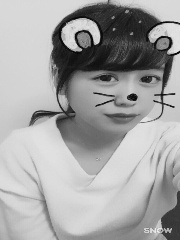

In [301]:
print("入力画像")
input_img = cv2.imread("./img/test.jpg", cv2.IMREAD_GRAYSCALE)
input_img = cv2.resize(input_img, big_size)
display_cv_image(input_img)

推測画像


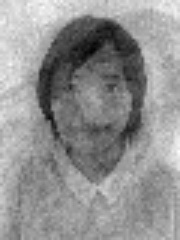

In [302]:
print("推測画像")
display_cv_image(img)